# HW1 : Data Science in Twitter Data

**Required Readings:** 
* Chapter 1 and Chapter 9 of the book [Mining the Social Web](https://www.safaribooksonline.com/library/view/mining-the-social/9781491973547/?orpq) 
* The codes for Chapters 1 and 9 are in [here](https://github.com/mikhailklassen/Mining-the-Social-Web-3rd-Edition/tree/master/notebooks).

** NOTE **
* Please don't forget to save the notebook frequently when working in Jupyter Notebook, otherwise the changes you made can be lost.

*----------------------

## Data Collection: Download Twitter Data using API

* As the first step of Data Science process, let's collect some twitter data. Choose a keyword and search tweets containing the keyword by using Twitter search API, and then download the searched tweets (including the meta data that the Search API returns) in a file. It is recommended that the number of searched tweets should be at least 300.
* Store the tweets you downloaded into a local file (txt file or json file) 

In [1]:
# What keyword did you choose?:  radio


In [4]:
import twitter
import json


# ---------------------------------------------
# Define a Function to Login Twitter API
def oauth_login():
    # Go to http://twitter.com/apps/new to create an app and get values
    # for these credentials that you'll need to provide in place of these
    # empty string values that are defined as placeholders.
    # See https://dev.twitter.com/docs/auth/oauth for more information
    # on Twitter's OAuth implementation.

    CONSUMER_KEY = ''
    CONSUMER_SECRET = ''
    OAUTH_TOKEN = ''
    OAUTH_TOKEN_SECRET = ''

    auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                               CONSUMER_KEY, CONSUMER_SECRET)

    twitter_api = twitter.Twitter(auth=auth)
    return twitter_api


# ----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

# Code from Chapter 9 of the book
def twitter_search(twitter_api, q, max_results=100):

    # See https://developer.twitter.com/en/docs/tweets/search/api-reference/get-search-tweets
    # and https://developer.twitter.com/en/docs/tweets/search/guides/standard-operators
    # for details on advanced search criteria that may be useful for 
    # keyword arguments
    
    # See https://dev.twitter.com/docs/api/1.1/get/search/tweets    
    results = twitter_api.search.tweets(q=q, count=100)
    
    # Iterate through batches of results by following the cursor until we
    # reach the desired number of results, keeping in mind that OAuth users
    # can "only" make 180 search queries per 15-minute interval. See
    # https://developer.twitter.com/en/docs/basics/rate-limits
    # for details. A reasonable number of results is ~1000, although
    # that number of results may not exist for all queries.
    
    # Enforce a reasonable limit
    max_results = min(300, max_results)
    
    for _ in range(10): # 10*100 = 1000
        try:
            next_results = results['search_metadata']['next_results']
        except KeyError as e: # No more results when next_results doesn't exist
            break
        
        search_results = twitter_api.search.tweets(q=q, count=100)
        #   add the tweets together
        results['statuses'] += search_results['statuses']
        #   update metadata
        results['search_metadata'].update(search_results['search_metadata'])
        
        if len(results['statuses']) >= max_results: 
            break
            
    return results

twitter_api = oauth_login()
q = "radio"

results = twitter_search(twitter_api, q, max_results=300)

# write to file
with open('twitter.json', 'w') as fp:
    json.dump(results, fp)




### Report  statistics about the tweets you collected 

In [5]:
# The total number of tweets collected:  300
print("The total number of tweets collected: "+str(len(results['statuses'])))

The total number of tweets collected: 396


# Data Exploration: Exploring the Tweets and Tweet Entities

**(1) Word Count:** 
* Load the tweets you collected in the local file (txt or json)
* compute the frequencies of the words being used in these tweets. 
* Plot a table of the top 30 most-frequent words with their counts

In [6]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

with open('twitter.json') as f:
    data = json.load(f)

# A word is defined by a series of characters surounded by spaces
def getWordFrequency(statuses):
    
    wordfreq = {}

    for tweet in statuses:
        words = tweet['text'].split()
        for word in words:
            # for each word in a tweet add it to the dict
            if word in wordfreq:
                wordfreq[word] = wordfreq[word]+1
            else:
                wordfreq[word] = 1
    # Sort by frequency     
    wordfreq = {k: v for k, v in sorted(wordfreq.items(), key=lambda item: item[1], reverse=True)}            
    return wordfreq

wordfreq = getWordFrequency(data['statuses'])

import pandas as pd

# print as a table
df = pd.DataFrame(wordfreq.items(), columns=["Word", "Freq"]) 
print(df[:30])




          Word  Freq
0           RT   228
1           on    98
2        radio    92
3            a    89
4           to    77
5          the    75
6           of    65
7            -    64
8           de    62
9           in    56
10          la    52
11           y    51
12       Radio    48
13         and    45
14          by    40
15          en    36
16        this    33
17         que    33
18           “    32
19         you    32
20          el    27
21          at    25
22       &amp;    25
23         for    24
24         por    24
25          is    24
26         con    24
27          En    23
28  Quarantine    22
29         The    21


** (2) Find the most popular tweets in your collection of tweets**

Please plot a table of the top 10 most-retweeted tweets in your collection, i.e., the tweets with the largest number of retweet counts.


In [7]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

def getPopularTweets(statuses,retweet_threshold=3):
    
    pop_freq = {}
    for status in statuses:
        if status['text'] not in pop_freq:
            pop_freq[status['text']] = status['retweet_count']

# Sort by frequency     
    pop_freq = {k: v for k, v in sorted(pop_freq.items(), key=lambda item: item[1], reverse=True)}            
    return pop_freq

pop_tweets = getPopularTweets(data['statuses'])

# print as a table
df = pd.DataFrame(pop_tweets.items(), columns=["Tweet", "RT"]) 
print(df[:10])








                                               Tweet     RT
0  RT @smuckersbytyler: Bro the way Tory Lanez in...  42357
1  RT @jairbolsonaro: - Hoje, 19h ao vivo, serei ...   5927
2  RT @marklevinshow: 1. NPR can’t help but lie a...   5501
3  RT @AXELKAISER: Suiza ya tiene la vacuna contr...   3900
4  RT @ElpremaArturo: El presidente del banco San...   3427
5  RT @iam_johnw: Katt Williams definitely funnie...   1604
6  RT @McFaul: HOW could he not have known this ?...   1328
7  RT @exo_schedules: DAILY #EXO SCHEDULE 🗓 20040...    990
8  RT @RAscotland: Such sad news to learn of the ...    725
9  RT @qtpiebyunbaek: 200402 JUNMYEON RADIO\n\nJu...    599


**(3) Find the most popular Tweet Entities in your collection of tweets**

Please plot the top 10 most-frequent hashtags and top 10 most-mentioned users in your collection of tweets.

In [16]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

def getHashtags(statuses):   
    hash_freq = {}
    for status in statuses:
        for hashtag in status['entities']['hashtags']:
            hashtag = hashtag['text']
            if hashtag in hash_freq:
                hash_freq[hashtag] = hash_freq[hashtag]+1
            else:
                hash_freq[hashtag] = 1
     # Sort by frequency     
    hash_freq = {k: v for k, v in sorted(hash_freq.items(), key=lambda item: item[1], reverse=True)}            
   
    return hash_freq

def getUserMentions(statuses):
    mention_freq = {}
    for status in statuses:
        for user_mention in status['entities']['user_mentions']:
            user_mention = user_mention['screen_name']
            if user_mention in mention_freq:
                mention_freq[user_mention] = mention_freq[user_mention]+1
            else:
                mention_freq[user_mention] = 1
     # Sort by frequency     
    mention_freq = {k: v for k, v in sorted(mention_freq.items(), key=lambda item: item[1], reverse=True)}            
    
    return mention_freq





hash_freq = getHashtags(data['statuses'])

# print Hash frequencies as a table
df_hash = pd.DataFrame(hash_freq.items(), columns=["Hashtag", "Count"]) 
print(df_hash[:10])


print("\n\n")


mention_freq = getUserMentions(data['statuses'])

# print User mentions as a table
df_users = pd.DataFrame(mention_freq.items(), columns=["User", "Mention Count"]) 
print(df_users[:10])

max_mentions = df_users['User'][0]


       Hashtag  Count
0   NowPlaying     20
1        radio      8
2         live      8
3  Coronavirus      8
4    WONKRADIO      7
5         kmox      6
6   水溜りボンドANN0      5
7  EmpireRadio      4
8   MDPolitics      4
9       MDGA20      4



              User  Mention Count
0        iam_johnw             16
1       AXELKAISER             11
2      purelylorde              8
3            lorde              8
4    jairbolsonaro              8
5           McFaul              5
6         mizuann0              5
7     _sailorsteph              5
8  tupamarolaramrt              4
9      Wil_Ngoumou              4


Plot a histogram of the number of user mentions in the list using the following bins.

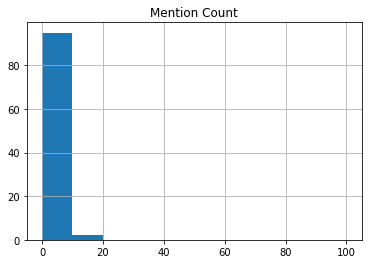

In [17]:
bins=[0, 10, 20, 30, 40, 50, 100]

# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

hist = df_users.hist(column='Mention Count',bins=bins)




 ** (optional task for fun) Getting "All" friends (followees) and "All" followers of a popular user in the tweets**

* choose a popular twitter user who has many followers in your collection of tweets.
* Get the list of all friends and all followers of the twitter user.
* Plot 20 out of the followers, plot their ID numbers and screen names in a table.
* Plot 20 out of the friends (if the user has more than 20 friends), plot their ID numbers and screen names in a table.

In [19]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

def getScreenNameIDs(userlist):
    screenname_dict = {}
    for user in userlist:
        screenname_dict[user['id']] = user['screen_name']
    return screenname_dict
        


print("Data for: " + str(max_mentions)+"\n")

friends = twitter_api.friends.list(screen_name=max_mentions)['users']

friend_dict = getScreenNameIDs(friends)

# print as a table
df_users = pd.DataFrame(friend_dict.items(), columns=["Friend IDs", "Screen Name"]) 
print(df_users)


print("\n\n")


followers = twitter_api.followers.list(screen_name="jairbolsonaro")['users']

followers_dict = getScreenNameIDs(followers)

# print as a table
df_users = pd.DataFrame(followers_dict.items(), columns=["Follower IDs", "Screen Name"]) 
print(df_users)




Data for: iam_johnw

             Friend IDs     Screen Name
0            2583313556    tamar_louris
1            2796912621    mike_zingaro
2            1566337508       choogotti
3            1135339009          tyiax0
4             716103612       zay_zay32
5             438513903        RayavanR
6             339302972       CeCeDumas
7            2908928416   robhundredsss
8             567273219      TheGOATJay
9            2349282585       adnsimone
10            324669893    BenjiHavinIt
11             35373686      Iam_AyHole
12           3025977845  BlueLemonGamer
13           1236632438         Dkenmac
14            561632418   SLUTTYASSKOTA
15  1145859996892241920   justfacts____
16            168332885      _casualcam
17           1252213273      OliffRiley
18           2195253714      LilRoyIvan
19           2921122280    cmccracken34



           Follower IDs      Screen Name
0   1244709895309492228    luanayaasmim1
1   1245867045192949760     MarleneZonta
2   124586575

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook.

** How to submit: **

        Please submit through Canvas, in the Assignment "HW1".
        